In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from pandas.tseries.offsets import MonthEnd

In [3]:
clean_data = pd.read_csv("/home/luke/workspace/Sector-Analysis/Luke_working_space/"+"fin_return_clean.csv")
clean_data.index = pd.DatetimeIndex(clean_data.iloc[:,0].values)
clean_data = clean_data.iloc[:,1:]

y = clean_data.iloc[:,[0]]
x = clean_data.iloc[:,1:]

In [35]:
np.sort(list(set(y.index.year)))

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [3]:
# logistic  = LogisticRegression(penalty='l2', C = 1/(1e-10))
# logistic.fit(x,y)

In [2]:
nunmber_of_years_lookback = 10

logistic_result_dict = {}
coef_all_df = pd.DataFrame()
accuracy_dict = {}
y_prediction_dict ={}
number_of_runs = 0.0
for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-2]:
    begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
    selection = (x.index>=begin_index) & (x.index <= end_index)
    spliced_x = x[selection]
    spliced_y = y[selection]
    assert(len(spliced_x)==nunmber_of_years_lookback*12)

    
    logistic  = LogisticRegression(penalty='l2', C = 1/(0.010))
    logistic.fit(spliced_x,spliced_y)
    coef_df = pd.DataFrame(logistic.coef_,columns = spliced_x.columns,index = [dt_index])
    coef_all_df = pd.concat([coef_all_df,coef_df])
    
    test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+3)+MonthEnd(-1)
    test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
    test_x = x[test_selection]
    test_y = y[test_selection]

    
    assert(len(test_y)==3)
    y_prediction = pd.DataFrame(logistic.predict(test_x),index = test_y.index,columns = test_y.columns)
    y_prediction_dict[dt_index] = y_prediction
    accuracy_df = ((y_prediction-test_y)==0)*1
    accuracy_dict[dt_index] = accuracy_df
    number_of_runs +=1
print(number_of_runs)

NameError: name 'pd' is not defined

In [31]:
# overall accuracy
mean_accuracy_list = []
for key,value in accuracy_dict.iteritems():
    mean_accuracy_list.append(list(value.values.flatten()))
np.mean(mean_accuracy_list)

0.56725146198830412

In [7]:
# total time we predicted correctly
tot = 0.0
for list_ in mean_accuracy_list:
    tot+=np.sum(list_)
tot

224.0

In [8]:
sort_key = np.sort(y_prediction_dict.keys())
for key in sort_key:
    print(y_prediction_dict[key])

            IYW US Equity
2005-12-31              0
2006-01-31              1
2006-02-28              0
            IYW US Equity
2006-01-31              1
2006-02-28              0
2006-03-31              0
            IYW US Equity
2006-02-28              0
2006-03-31              0
2006-04-30              1
            IYW US Equity
2006-03-31              1
2006-04-30              1
2006-05-31              1
            IYW US Equity
2006-04-30              1
2006-05-31              1
2006-06-30              1
            IYW US Equity
2006-05-31              1
2006-06-30              1
2006-07-31              1
            IYW US Equity
2006-06-30              1
2006-07-31              1
2006-08-31              1
            IYW US Equity
2006-07-31              1
2006-08-31              1
2006-09-30              1
            IYW US Equity
2006-08-31              1
2006-09-30              1
2006-10-31              1
            IYW US Equity
2006-09-30              1
2006-10-31  

2016-01-31              1
            IYW US Equity
2015-12-31              1
2016-01-31              1
2016-02-29              1
            IYW US Equity
2016-01-31              1
2016-02-29              1
2016-03-31              1
            IYW US Equity
2016-02-29              1
2016-03-31              1
2016-04-30              1
            IYW US Equity
2016-03-31              1
2016-04-30              1
2016-05-31              1
            IYW US Equity
2016-04-30              1
2016-05-31              1
2016-06-30              1
            IYW US Equity
2016-05-31              1
2016-06-30              1
2016-07-31              1
            IYW US Equity
2016-06-30              1
2016-07-31              0
2016-08-31              1
            IYW US Equity
2016-07-31              0
2016-08-31              1
2016-09-30              1
            IYW US Equity
2016-08-31              1
2016-09-30              1
2016-10-31              1
            IYW US Equity
2016-09-30  

In [103]:
# number of times we predicted 1 correctly
number_of_one_prediction = 0.0
for key,values in y_prediction_dict.iteritems():
    number_of_one_prediction += np.sum((values.values ==1)*1)
number_of_one_prediction

172.0

In [40]:
coef_stat = pd.concat([coef_all_df.apply(np.mean),coef_all_df.apply(np.std)],1).T
coef_stat.index = ['Mean','Std']

In [56]:
sm = coef_stat.loc['Mean',:].values
sv = (coef_stat.loc['Std',:].values)**2
n = len(coef_all_df.index)
tt = pd.DataFrame((sm - 0.0)/np.sqrt(sv/float(n)),index = x.columns).T
tt

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
0,9.568719,29.160297,-18.147731,21.486245,-0.014508,3.36772,-11.96969,-27.999612,1.708932,-0.156508,...,-1.962827,-12.690094,-15.41392,-1.472701,4.908349,22.268717,-8.321796,-2.479287,6.197995,-22.553244


In [57]:
from scipy import stats
pd.DataFrame(stats.t.sf(np.abs(tt), n-1),columns = x.columns)

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
0,1.308168e-16,2.938396e-55,7.583111e-36,2.260926e-42,0.494225,0.000516,3.091574e-22,1.771511e-53,0.045081,0.437954,...,0.026041,6.582586e-24,4.739541e-30,0.071782,0.000002,8.148280e-44,1.011643e-13,0.007307,4.597423e-09,2.478062e-44


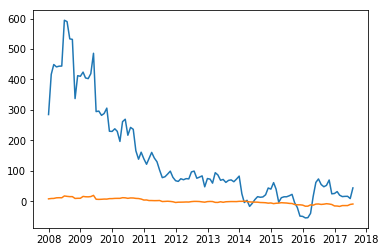

In [60]:
import matplotlib.pyplot as plt
plt.plot(coef_all_df.loc[:,['GDP','UMCSENT']],'-')
plt.show()